In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model



In [5]:
import os

print(os.listdir("../models"))


[]


In [9]:
model.save("../models/crop_disease_cnn_model.keras")


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATASET_PATH = r"C:\Users\DELL\Downloads\Crop_Disease_Yield_Project\data\PlantVillage"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator = val_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 8247 images belonging to 16 classes.


In [15]:
model = load_model("../models/crop_disease_cnn_model.keras", compile=False)


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


import numpy as np

predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes


258/258 ━━━━━━━━━━━━━━━━━━━━ 115s 443ms/step


In [16]:
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes


258/258 ━━━━━━━━━━━━━━━━━━━━ 102s 395ms/step


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
model = load_model("../models/crop_disease_cnn_model.keras", compile=False)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATASET_PATH = r"C:\Users\DELL\Downloads\Crop_Disease_Yield_Project\data\PlantVillage"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator = val_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 8247 images belonging to 16 classes.


In [4]:
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes


258/258 ━━━━━━━━━━━━━━━━━━━━ 103s 398ms/step


In [5]:
class_names = list(validation_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))


                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.00      0.00      0.00       197
                     Pepper__bell___healthy       0.00      0.00      0.00       295
                               PlantVillage       0.60      0.01      0.02      4127
                      Potato___Early_blight       0.00      0.00      0.00       200
                       Potato___Late_blight       0.00      0.00      0.00       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.05      1.00      0.10       425
                        Tomato_Early_blight       0.00      0.00      0.00       200
                         Tomato_Late_blight       0.00      0.00      0.00       381
                           Tomato_Leaf_Mold       0.00      0.00      0.00       190
                  Tomato_Septoria_leaf_spot       0.00      0.00

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


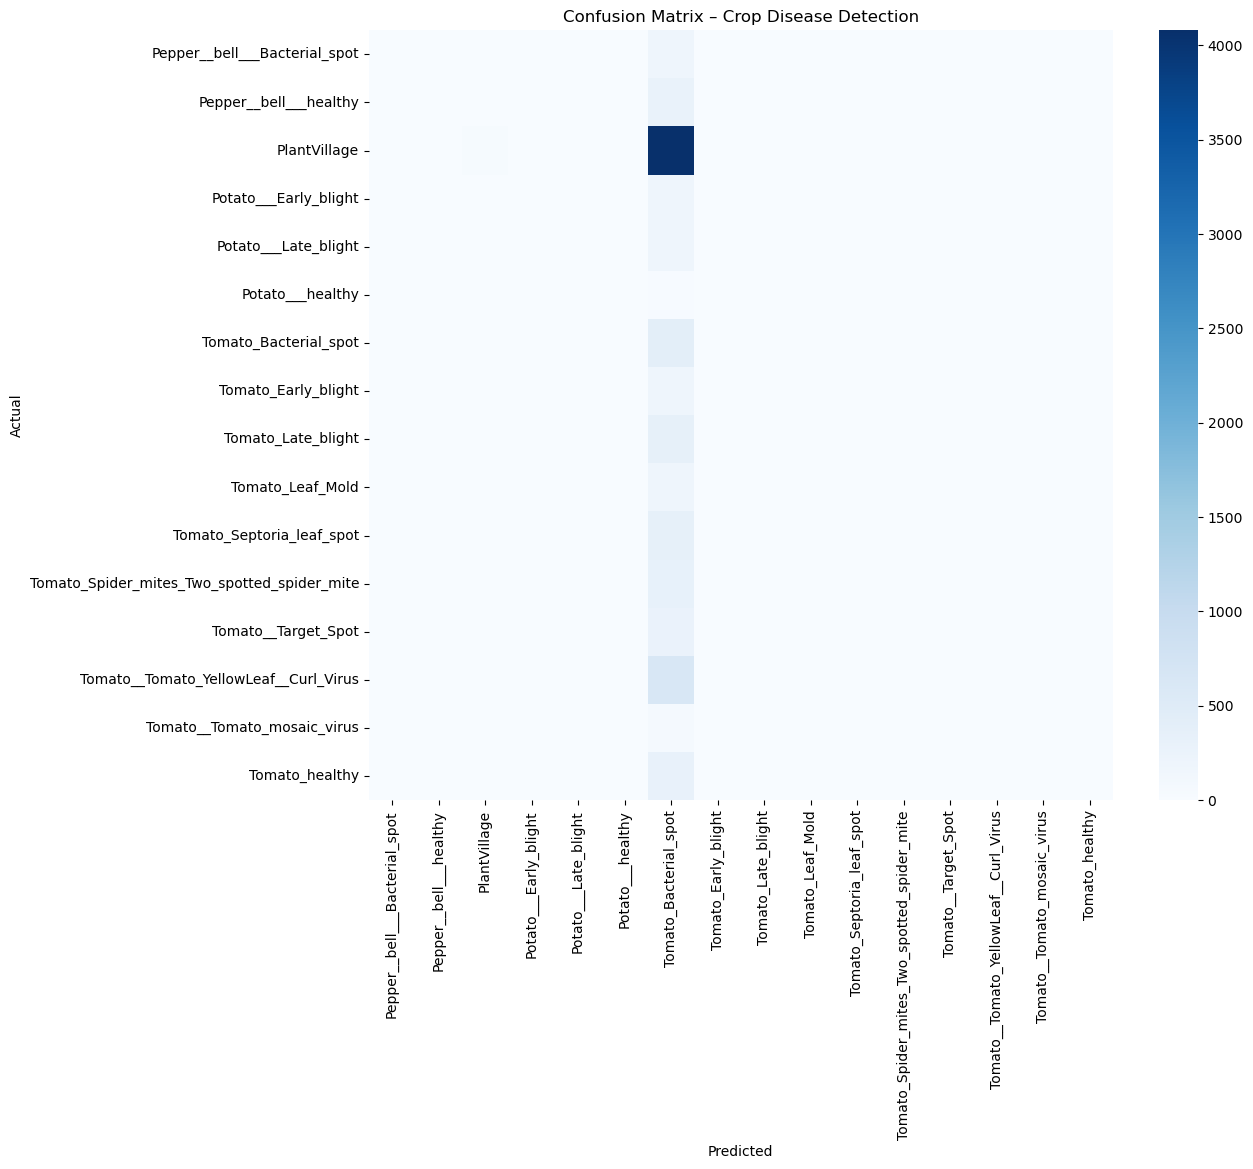

In [6]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Crop Disease Detection")
plt.show()


In [7]:
import pandas as pd

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
df_report.to_csv("../results/disease_classification_report.csv")


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
